In [2]:
import numpy as np
from collections import Counter
f=open(r"C:\Users\User\Documents\TXT\txt-raw\200mW_RAW_live_autofluorescence_Ch2.txt", "r");
a = [];
a1 = [];
lines = f.readlines();
for line in lines:
    line = line.split(',')[0];
    line = line.split()[0:];
    j = 1;
    for word in line:
        try:
            if j == 2:
                a.append(int(word));
            j = j + 1;
        except ValueError:
            pass


In [4]:
import numpy as np
f=open(r"C:\Users\User\Documents\TXT\txt-l929\200mW_L929_live(95%)_autofluorescence_Ch2.txt", "r");
b = [];
lines = f.readlines();
for line in lines:
    line = line.split(',')[0];
    line = line.split()[0:];
    j = 1;
    for word in line:
        try:
            if j == 2:
                b.append(int(word));
            j = j + 1;
        except ValueError:
            pass


In [5]:
import numpy as np
f=open(r"C:\Users\User\Documents\TXT\txt-c2c12\200mW_C2C12_live_autofluorescence_Ch2.txt", "r");
c = [];
lines = f.readlines();
for line in lines:
    line = line.split(',')[0];
    line = line.split()[0:];
    j = 1;
    for word in line:
        try:
            if j == 2:
                c.append(int(word));
            j = j + 1;
        except ValueError:
            pass


In [6]:
import numpy as np
f=open(r"C:\Users\User\Documents\TXT\txt-b16-f10\200mW_B16-F10_live(77%)_autofluorescence_Ch2.txt", "r");
d = [];
lines = f.readlines();
for line in lines:
    line = line.split(',')[0];
    line = line.split()[0:];
    j = 1;
    for word in line:
        try:
            if j == 2:
                d.append(int(word));
            j = j + 1;
        except ValueError:
            pass


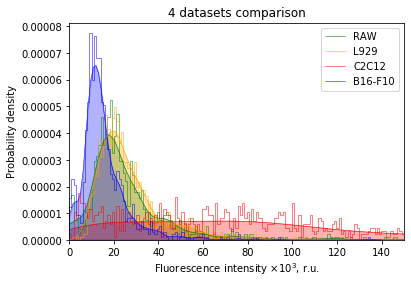

In [8]:
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

#верхняя граница по оси х
bins = np.linspace(0, 150000, 150)

#строим 1-ю гистограмму
ax = sns.distplot(a, bins, hist = True, kde = True, kde_kws={"color": "g", "lw": 0.5, "label": "RAW"}, hist_kws={"histtype": "step", "linewidth": 0.5, "alpha": 1, "color": "g"})
#задаём границу заполнения по кривой
kde_x, kde_y = ax.lines[0].get_data()
#делаем заливку области под кривой
ax.fill_between(kde_x, kde_y, color = 'g', alpha = 0.3)

#строим 2-ю гистограмму
bx = sns.distplot(b, bins, hist = True, kde = True, kde_kws={"color": "orange", "lw": 0.5, "label": "L929"}, hist_kws={"histtype": "step", "linewidth": 0.5, "alpha": 1, "color": "orange"})
kde_bx, kde_by = bx.lines[1].get_data()
bx.fill_between(kde_bx, kde_by, interpolate = True, color = 'orange', alpha = 0.3)

#строим 3-ю гистограмму
cx = sns.distplot(c, bins, hist = True, kde = True, kde_kws={"color": "r", "lw": 0.5, "label": "C2C12"}, hist_kws={"histtype": "step", "linewidth": 0.5, "alpha": 1, "color": "r"})
kde_cx, kde_cy = cx.lines[2].get_data()
cx.fill_between(kde_cx, kde_cy, interpolate = True, color = 'r', alpha = 0.3)

#строим 4-ю гистограмму
dx = sns.distplot(d, bins, hist = True, kde = True, kde_kws={"color": "b", "lw": 0.5, "label": "B16-F10"}, hist_kws={"histtype": "step", "linewidth": 0.5, "alpha": 1, "color": "b"})
kde_dx, kde_dy = dx.lines[3].get_data()
dx.fill_between(kde_dx, kde_dy, color = 'b', alpha = 0.3)

plt.legend(loc='upper right')

plt.xlim(0,150000);
plt.xticks(np.arange(0,150000,20000),np.arange(0,150,20))

#названия осей и графика
plt.xlabel(r'Fluorescence intensity $\times10^3$, r.u.')
plt.ylabel('Probability density')
plt.title('4 datasets comparison')

plt.savefig(r"C:\Users\User\Documents\TXT\Template_histogram_4_datasets_comparison.png", bbox_inches='tight', dpi=600);
plt.show()

In [11]:
#Определяем, насколько различие между массивами данных a и b статистически значимо
import scipy
from scipy import stats
scipy.stats.ttest_ind(a,b)

Ttest_indResult(statistic=-0.5721002504318171, pvalue=0.5673216678612407)